In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 아래 두줄은 본 필자가 항상 쓰는 방법이다.
# matplotlib의 기본 scheme말고 seaborn scheme을 세팅하고, 
# 일일이 graph의 font size를 지정할 필요 없이 seabron의 font_scale을 사용하면 편리
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 01. Dataset 확인

In [3]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- feature : Pcalss, Age, SibSp, Parch, Fare
- target label : Survived

In [5]:
# describe( ) : feature가 가진 통계치들을 반환
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null data check

In [7]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- Train, Test set에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재
- MANO라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있다.

<AxesSubplot:>

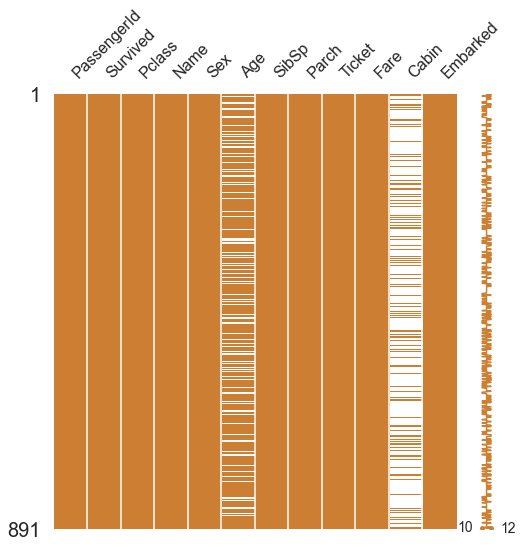

In [9]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

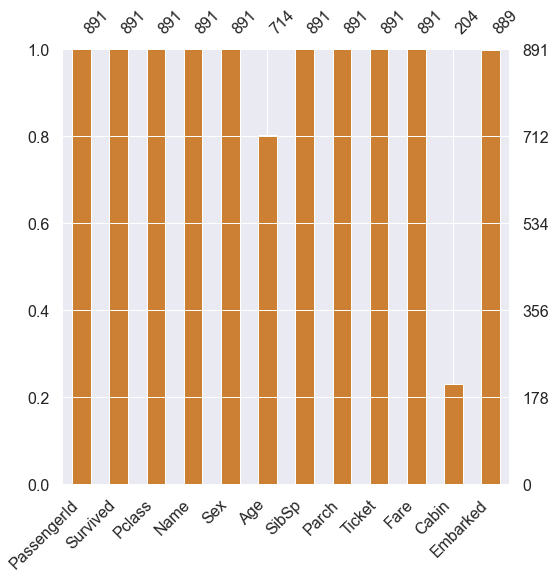

In [10]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8), color = (0.8,0.5,0.2))

<AxesSubplot:>

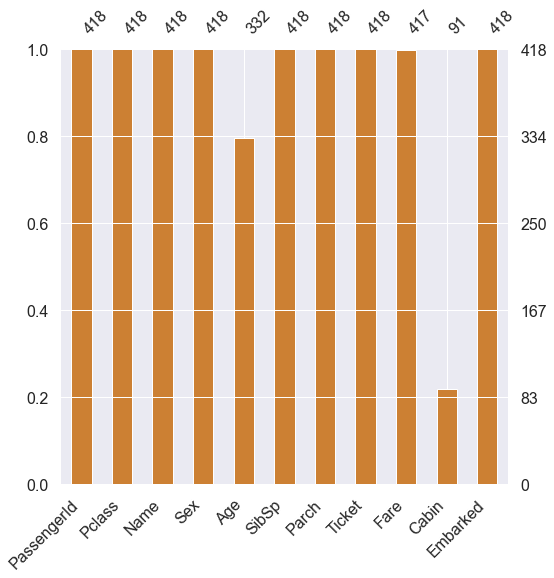

In [11]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

## 1.2 Target label 확인
- target label이 어떤 distribution을 가지고 있는지 확인해야 한다.
- 지금 같은 binary classification 문제의 경우, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다.

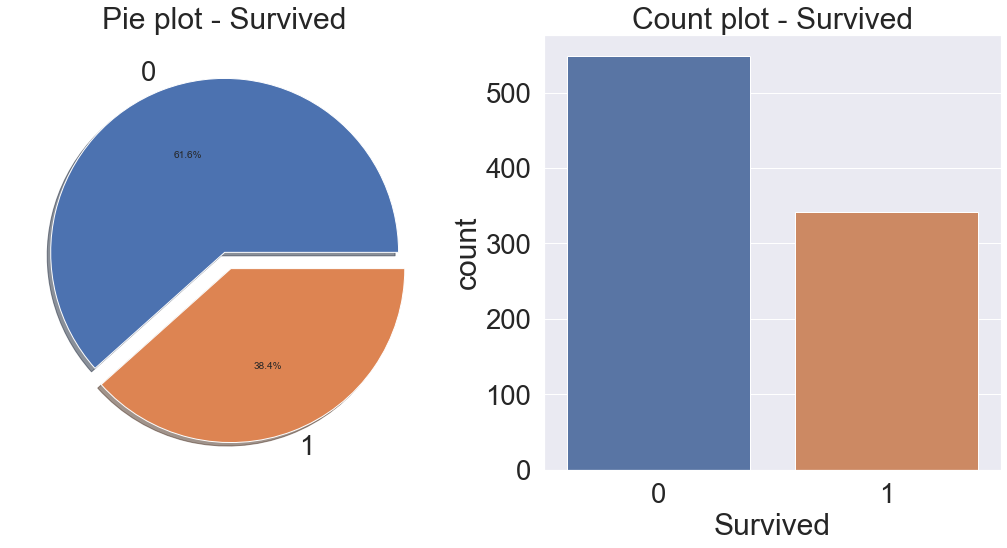

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 죽은 사람들이 많음
- 38.4%가 살아남음
- target label의 분포가 제법 균일(balanced)하다.
- 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 된다.
- 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 된다.

# 02. Exploratory data analysis
## 2.1 Pclass
- Pclass는 ordinal, 서수형 데이터이다.
- 카테고리이면서, 순서가 잇는 데이터 타입
- 먼저 Pclass에 다른 생존률의 차이를 살펴보기
    - 엑셀의 피벗차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있다. 또한 pivot이라는 메소드도 있다.
- 'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그러고 나면 각 pclass마다 0,1이 count가 되는데, 이를 평균내면 각 pclass별 생존률이 나온다
- 아래와 같이 count()를 하면, 각 class에 몇명이 있는지 확인할 수 있으며, sum()을 하면, 216명중 생존한(survived=1)사람의 총합을 주게 된다.

In [15]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

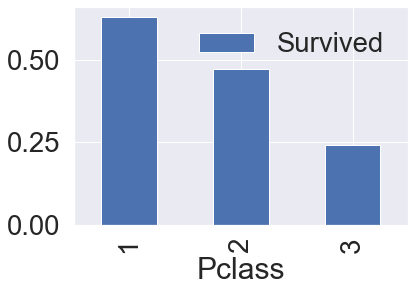

In [18]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

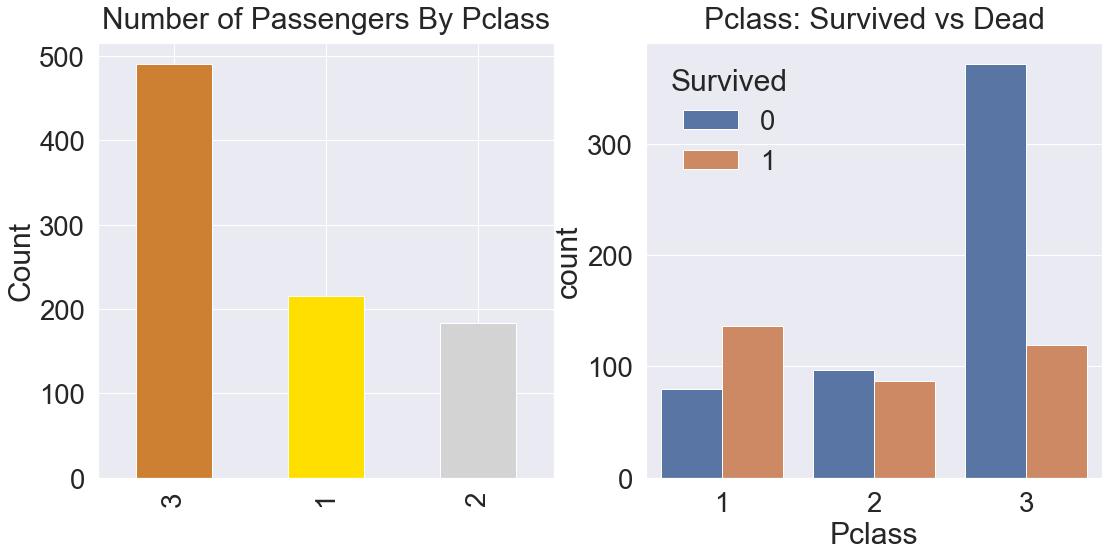

In [19]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있다. Pclass 1,2,3 순서대로 63%, 48%, 25%이다.
- 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다.

## 2.2 Sex
- 성별로 생존률이 어떻게 달라지는지 확인

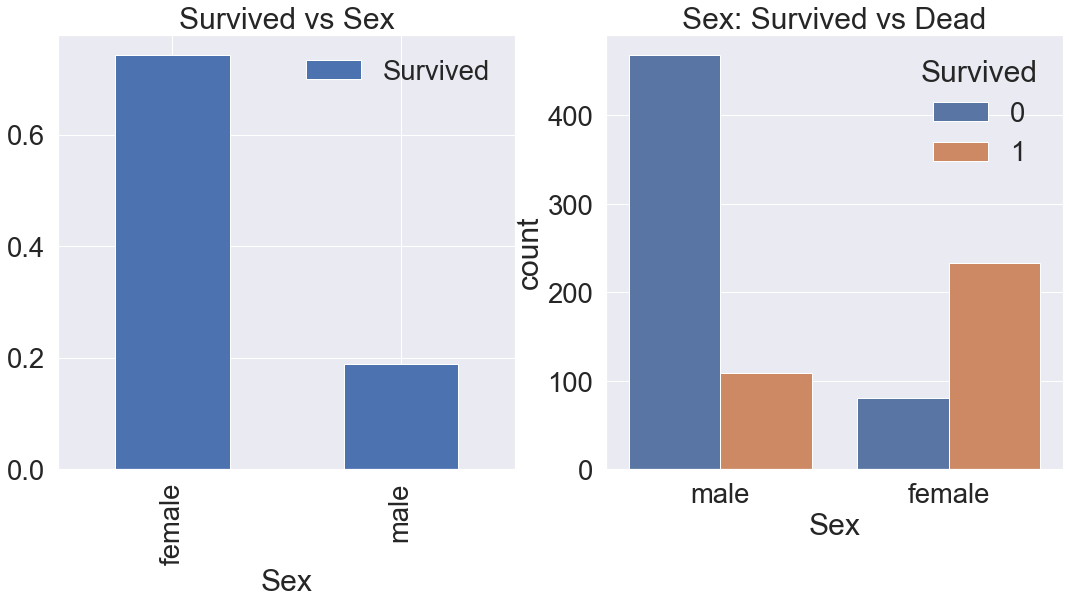

In [21]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [22]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
pd.crosstab(df_train['Sex'],df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있다.

## 2.3 Both Sex and Pclass
- Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인
- seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

- factorplot의 경우 Seaborn 0.11.0 버전 이후의 버전에서 동작
- 따라서 코드를 수정하여 factorplot 대신 catplot을 사용
- kind 메서드 종류
    - "point": 점 그래프
    - "bar": 막대 그래프
    - "strip": 스트립 플롯
    - "swarm": 스웜 플롯
    - "box": 박스 플롯
    - "violin": 바이올린 플롯
    - "boxen": 박스엔 플롯
    - "count": 카운트 플롯

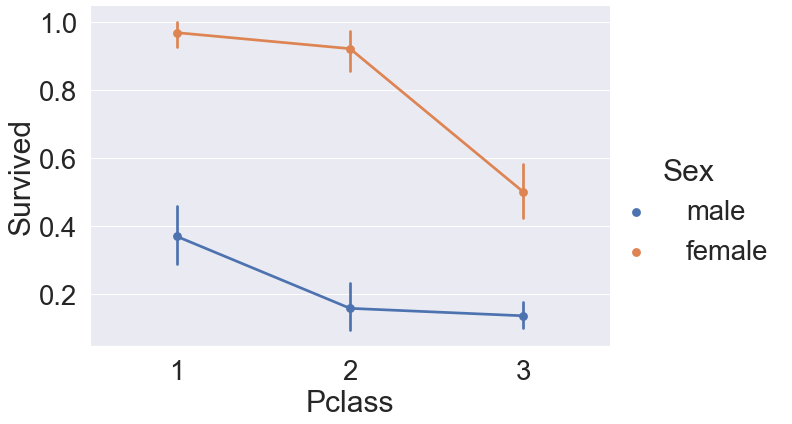

In [30]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)

- 모든 클래스에서 female이 살 확률이 male보다 높은걸 알 수 있다.
- 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다

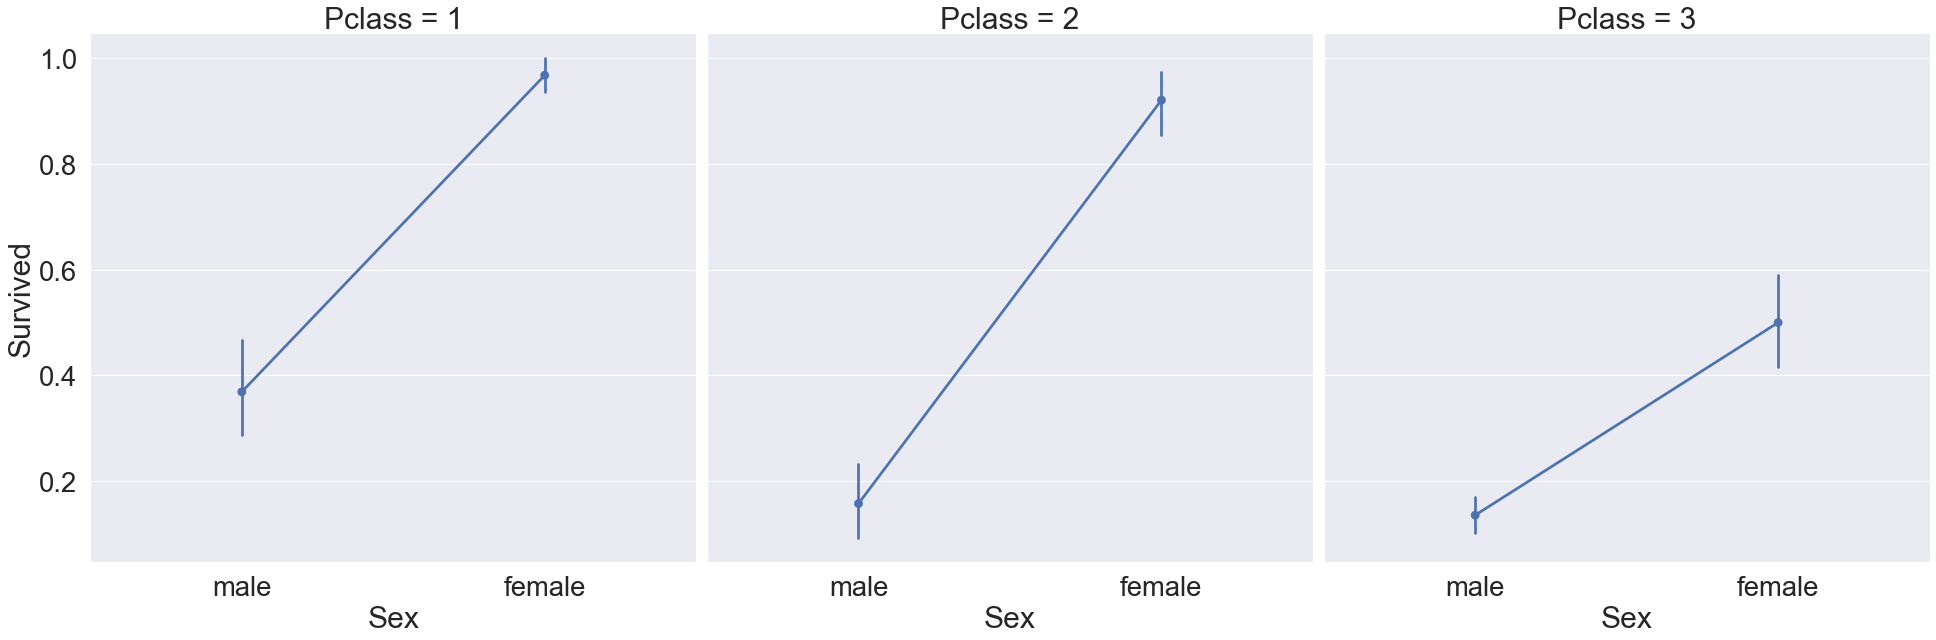

In [32]:
sns.catplot(x='Sex',y='Survived',col='Pclass',data=df_train, kind='point', height=9, aspect=1)

## 2.4 Age

In [33]:
print('제일 나이 많은 탐승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탐승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


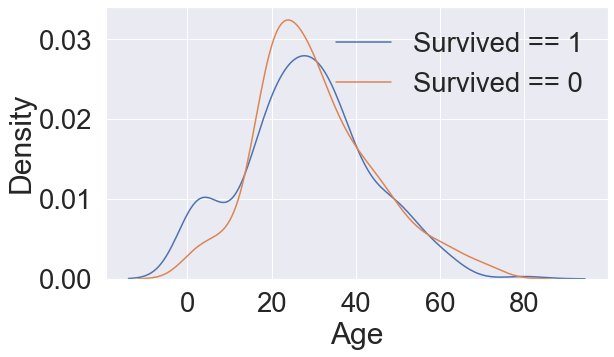

In [35]:
# 생존에 따른 Age의 histogram
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많음

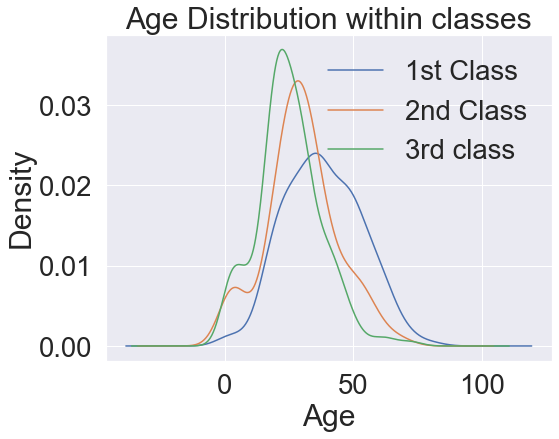

In [36]:
# Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd class'])

- Class가 높을 수록 나이 많은 사람의 비중이 커짐
- 나이대가 변하면서 생존률이 어떻게 되는지 보려고 한다.
- 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 확인

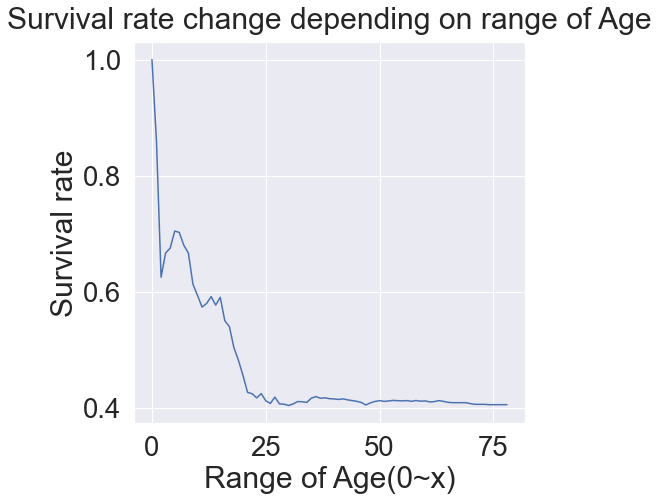

In [37]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 확실히 높은것을 확인할 수 있다.
- 나이가 중요한 feature로 쓰일 수 있음을 확인함

## 2.5 Pclass, Sex, Age
- Sex, Pclass, Age, Survived 모두에 대해 violinplot으로 쉽게 확인하기
- x축은 나눠서 보고싶어하는 case(Pclass, Sex)를 나타내고
- y축은 distribution(Age)

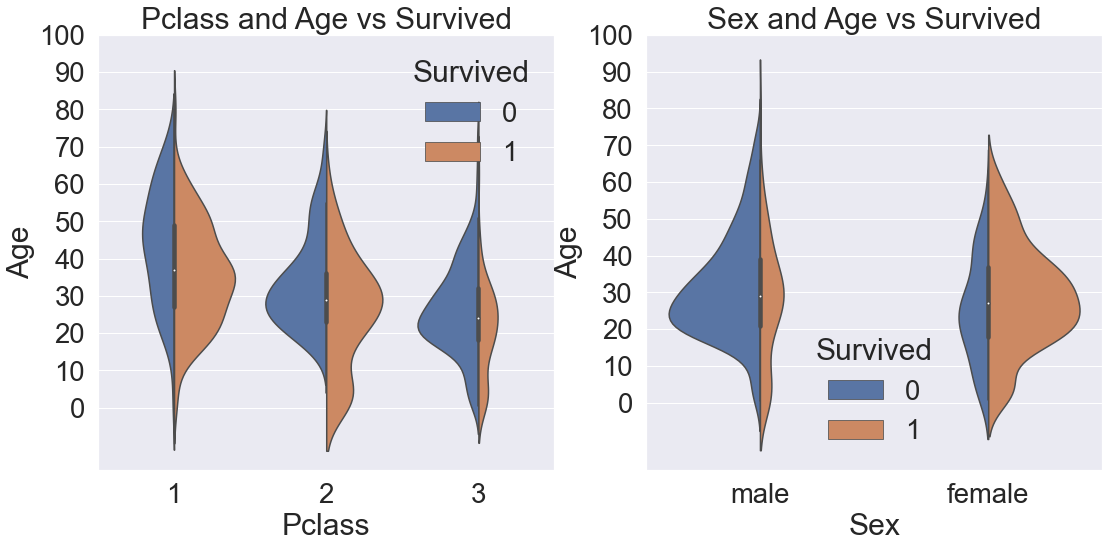

In [39]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=df_train, x="Pclass",y="Age", hue="Survived", scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot( data=df_train,x="Sex",y="Age", hue="Survived", scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프
- 오른쪽 그림은 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴수록 생존을 많이 한 것을 볼 수 있다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있다.
- 여성과 아이를 먼저 챙긴것을 볼 수 있다.

## 2.6 Embarked
- Embarked : 탑승한 항구

<AxesSubplot:xlabel='Embarked'>

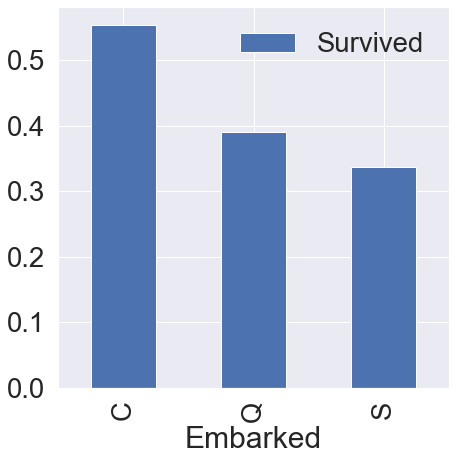

In [40]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 생존률은 조금 비슷한거 같지만 그래도 C가 제일 높음
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만 그래도 사용
- 모델을 만들고 나면 사용한 featrue들이 얼마나 중요한 역할을 했는지 확인해볼 수 있다.

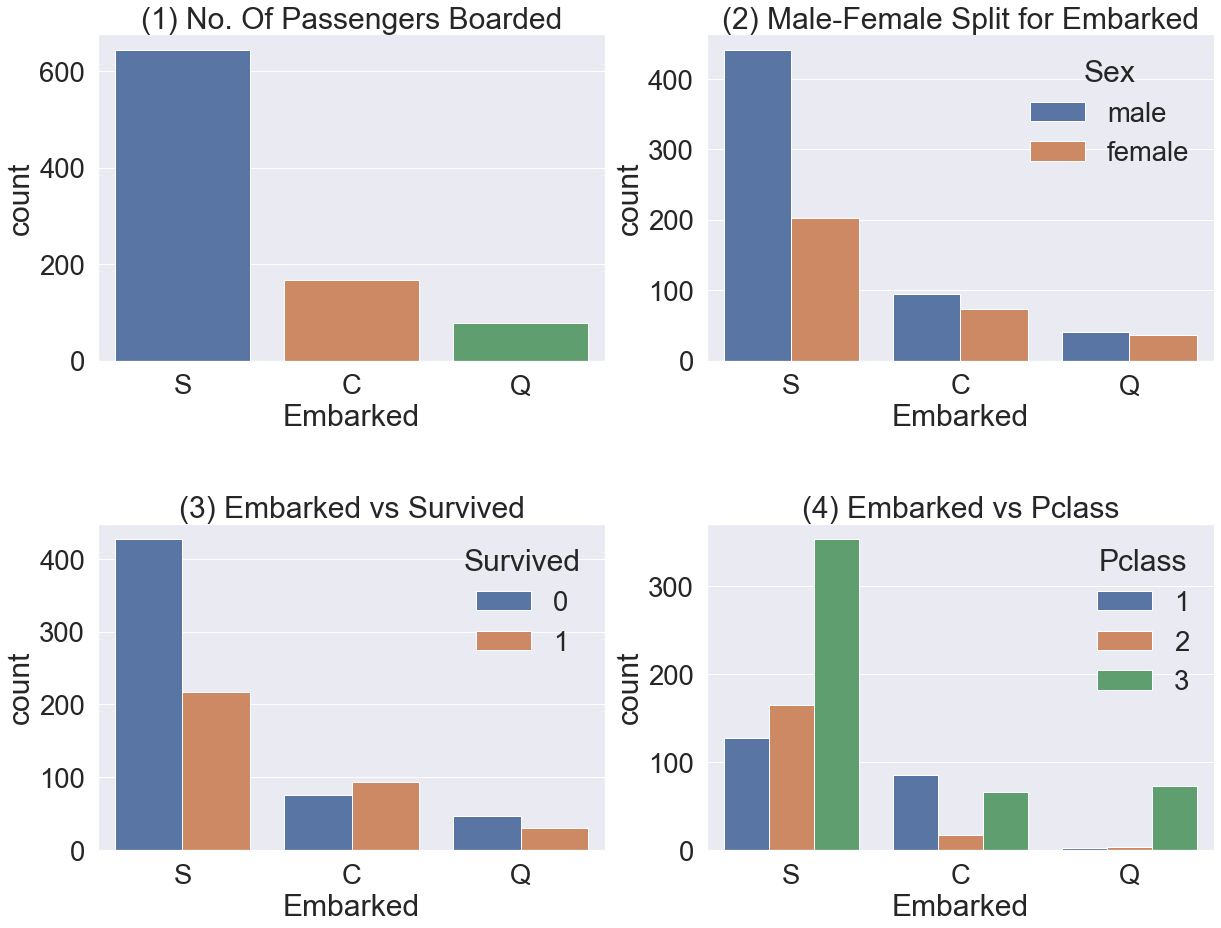

In [43]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue = 'Sex', data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) : 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승
- Figure(2) : C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많다
- Figure(3) : 생존확률이 S 경우 많이 낮은걸 볼 수 있다.
- Figure(4) : Class로 split해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇다. S는 3rd class가 많아서 생존확률이 낮게 나온다.

## 2.7 Family - SibSp(형재 자매) + Parch(부모, 자녀)
- SibSp와 Parch를 합쳐서 Family로 만든 후 분석 진행

In [45]:
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch'] + 1 # 자신을 포함해야 하니 1을 더한다.
df_test['FamilySize'] = df_test['SibSp']+df_test['Parch'] + 1

In [46]:
print("Maximum size of Family", df_train['FamilySize'].max())
print("Minimum size of Family", df_train['FamilySize'].min())

Maximum size of Family 11
Minimum size of Family 1


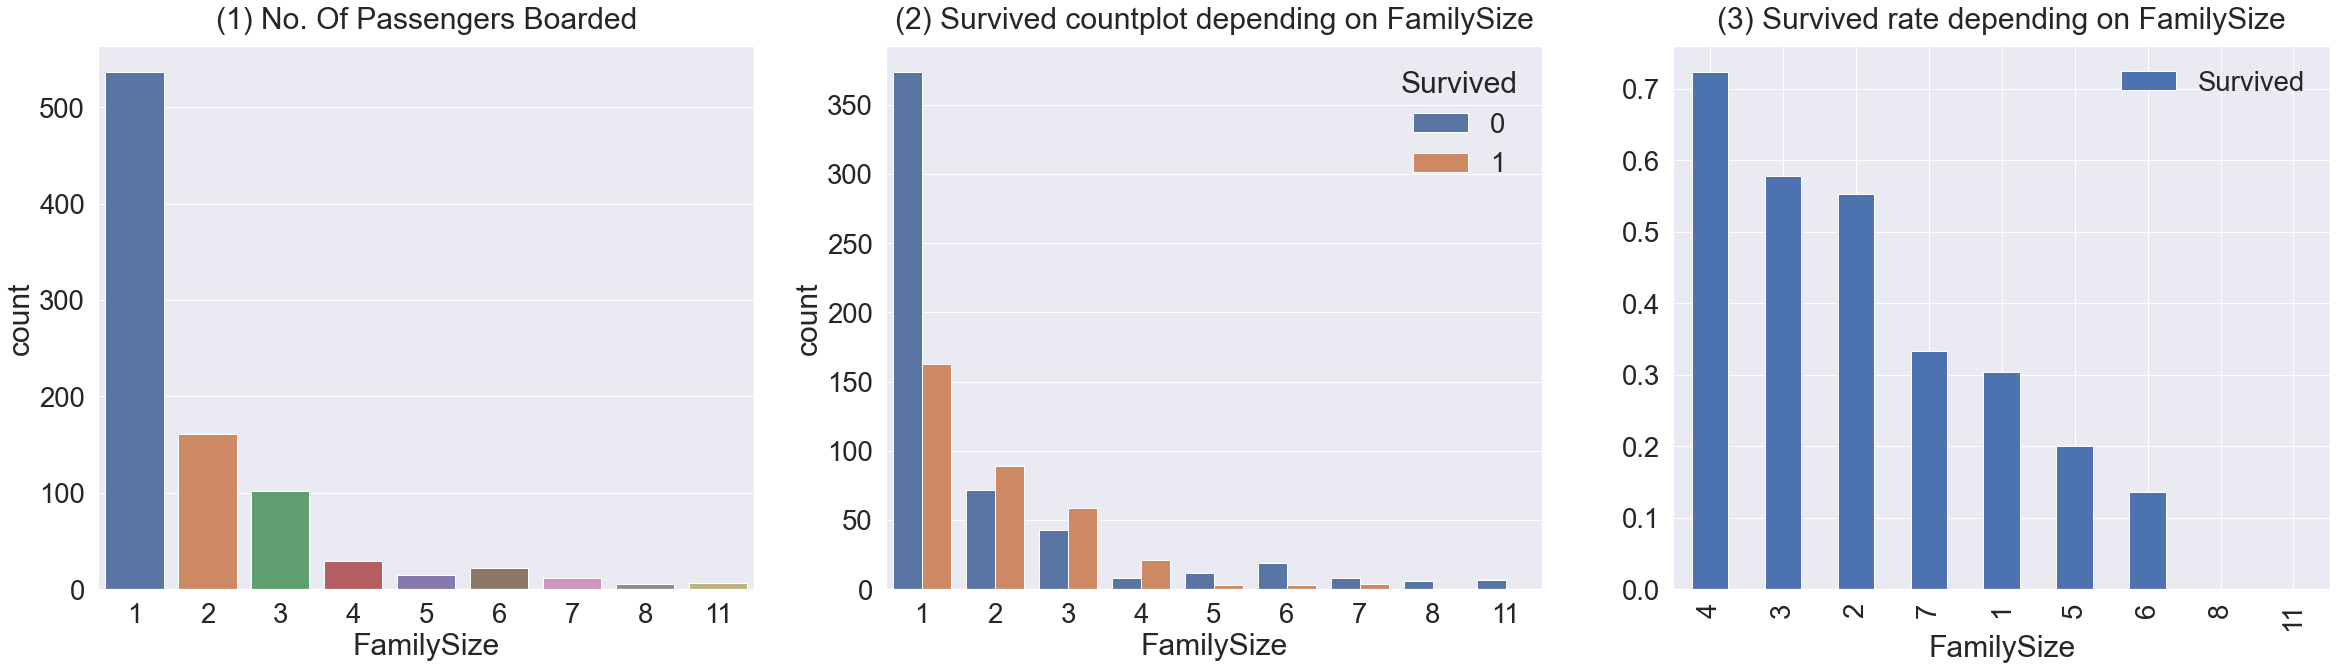

In [47]:
# FamilySize와 생존의 관계 확인
f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot(x='FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) : 가족 크기가 1~11까지 있음을 볼 수 있다. 대부분 1명이고 그 다음으로 2,3,4명이다.
- Figure(2),(3) : 가족 크기에 따른 생존률 비교
    - 가족이 4명인 경우가 가장 생존확률이 높다.
    - 가족이 많아질수록, (5,6,7,8,11) 생존확률이 낮아진다.
    - 가족수가 너무 작아도(1), 너무 커도(5,6,8,11) 생존확률이 작다
    - 3~4명 선에서 생존확률이 높은걸 확인할 수 있다.

## 2.8 Fare
- Fare : 탑승요금, contious feature

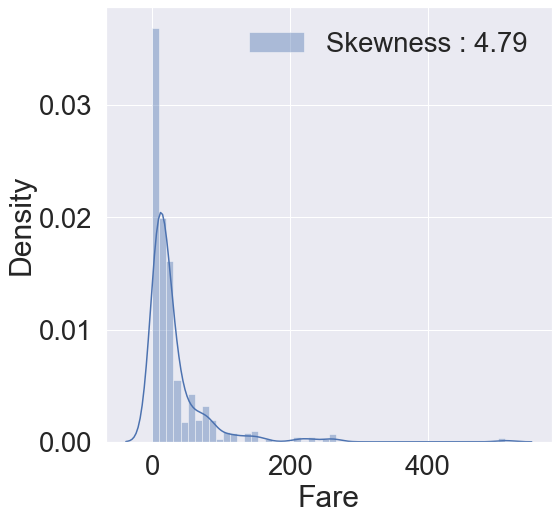

In [48]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew(), ax=ax))
g = g.legend(loc='best')

- distributino이 매우 비대칭인것을 확인할 수 있다. -> high skewness
    - 만약 이대로 모델에 넢어준다면 자칫 모델이 잘못 학습할 수 있다.
    - 몇개 없는 outlier에 대해서 너무 민감하게 반응한다면, 실제 예측시에 좋지 못한 결과를 부를 수 있다.
- outlier의 영향을 줄이기 위해 Fare에 log를 취함

In [49]:
# dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 map, apply를 사용하면 매우 손쉽게 적용할 수 있다.
# 파이썬의 간단한 lambda함수를 이용해 간단하게 로글를 적용하는 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용된다.

# testset에 있는 nan value를 평균값으로 치환
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i>0 else 0)

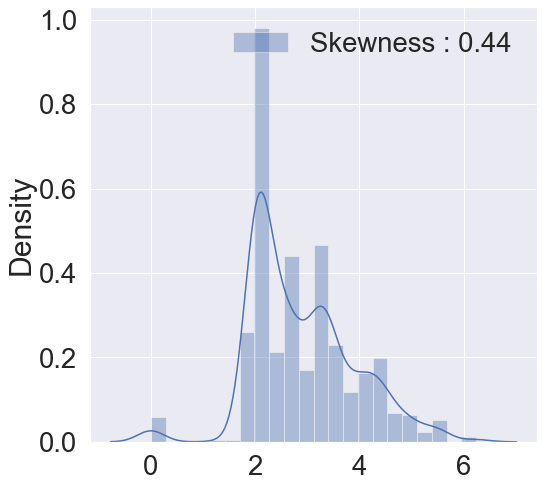

In [50]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(x=df_train['Fare'], color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

- log를 취하니, 비대칭성이 많이 사라진 것을 볼 수 있다.
- 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
- 방금한 부분은 feature engineering에 들어가는 부분
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 한다. 

## 2.9 Cabin
- Cabin의 feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않다.
- 그러므로 세우려는 모델에 포함시키지 않음

In [51]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket
- 이 feature은 NaN은 없다
- 일단 string data이므로 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요하다.

In [52]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

- ticket number는 매우 다양하다
    - 이런 경우 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까?